In [4]:
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
hits = ['AP1B1','ARL10','ASPSCR1','CHMP2A','KIF6','CLVS2','CDC42EP3','CHMP2B','GGA1','GOLT1B','HIP1R','VPS26B','PKD1L2','RIMS2','VCP']

In [200]:
def draw_edgelists(network, 
                   highlight = [], 
                   add_process = False, 
                   add_mtb = False,
                   node_colour = 'blue',
                   process_colour = 'lightgreen', 
                   mtb_colour = 'red', 
                   highlight_colour='lightblue',
                   h = 10, 
                   w = 20, 
                   title='Network',
                   title_size = 24,
                   font_size = 16,
                   node_size = 100,
                   filename = 'network',
                   dpi=200
                  ):

    # create edgelist
    edges = []
    nodes = {}
    lines = open(network).readlines()[1:] # remove headers
    for line in lines: # edges from network file 
        line = line.split(',')

        node1=line[0].strip()
        node2=line[1].strip()
        if node1 not in nodes: nodes[node1] = node_colour
        if node2 not in nodes: nodes[node2] = node_colour

        edge = line[0].strip()+' '+line[1].strip()
        edges.append(edge)
    
    
    add_nodes={}
    process = open(add_process).readlines()[1:] if add_process else []
    for lines, colour in zip([process], [process_colour]): # process edges
        for line in lines:
            line = line.split(',')

            node1=line[0].strip()
            node=line[1].strip()
            if node1 not in nodes: add_nodes[node1] = colour
            if node2 not in nodes: add_nodes[node2] = colour

            edge = line[0].strip()+' '+line[1].strip()
            edges.append(edge)
    nodes.update(add_nodes)

    add_nodes={}
    mtb =  open(add_mtb).readlines()[1:] if add_mtb else []
    for lines, colour in zip([mtb], [mtb_colour]): # mtb edges
        for node in nodes:
            for line in lines:
                if node in line: # only add mtb if connected to ndetwork
                    line = line.split(',')

                    node1=line[0].strip()
                    node=line[1].strip()
                    if node1 not in nodes: add_nodes[node1] = colour
                    if node2 not in nodes: add_nodes[node2] = colour

                    edge = line[0].strip()+' '+line[1].strip()
                    edges.append(edge)  
    nodes.update(add_nodes)
    
    # color highlight nodes
    for node in nodes:     
        if node in highlight: nodes[node]=highlight_colour

    nodelist = nodes.keys()
    colorlist = nodes.values()
    
    # write/read edgelist
    open("edgelist.txt", 'w+').write('\n'.join(edges))
    G=nx.read_edgelist('edgelist.txt')

    # plot and savedown
    nx.draw(G, with_labels=True, node_size=node_size, font_color='white', font_size=font_size, nodelist=nodelist, node_color=colorlist)
    plt.gcf().set_size_inches(w, h)
    plt.gcf().suptitle(title, fontsize=title_size, color='white')
    plt.gcf().set_facecolor('grey')
    plt.gcf().savefig(filename, dpi=dpi, facecolor='grey')




In [201]:
mtb = ["Eis" , "esxA" ,"esxH_esxG" ,"IpdC" ,"ndkA" ,"PPE2" ,"PstS1" ,"PtpA" ,"Rv2779c" ,"SapM"]
hit = ['AP1B1','ARL10','ASPSCR1','CHMP2A','KIF6','CLVS2','CDC42EP3','CHMP2B','GGA1','GOLT1B','HIP1R','VPS26B','PKD1L2','RIMS2','VCP']

model 1

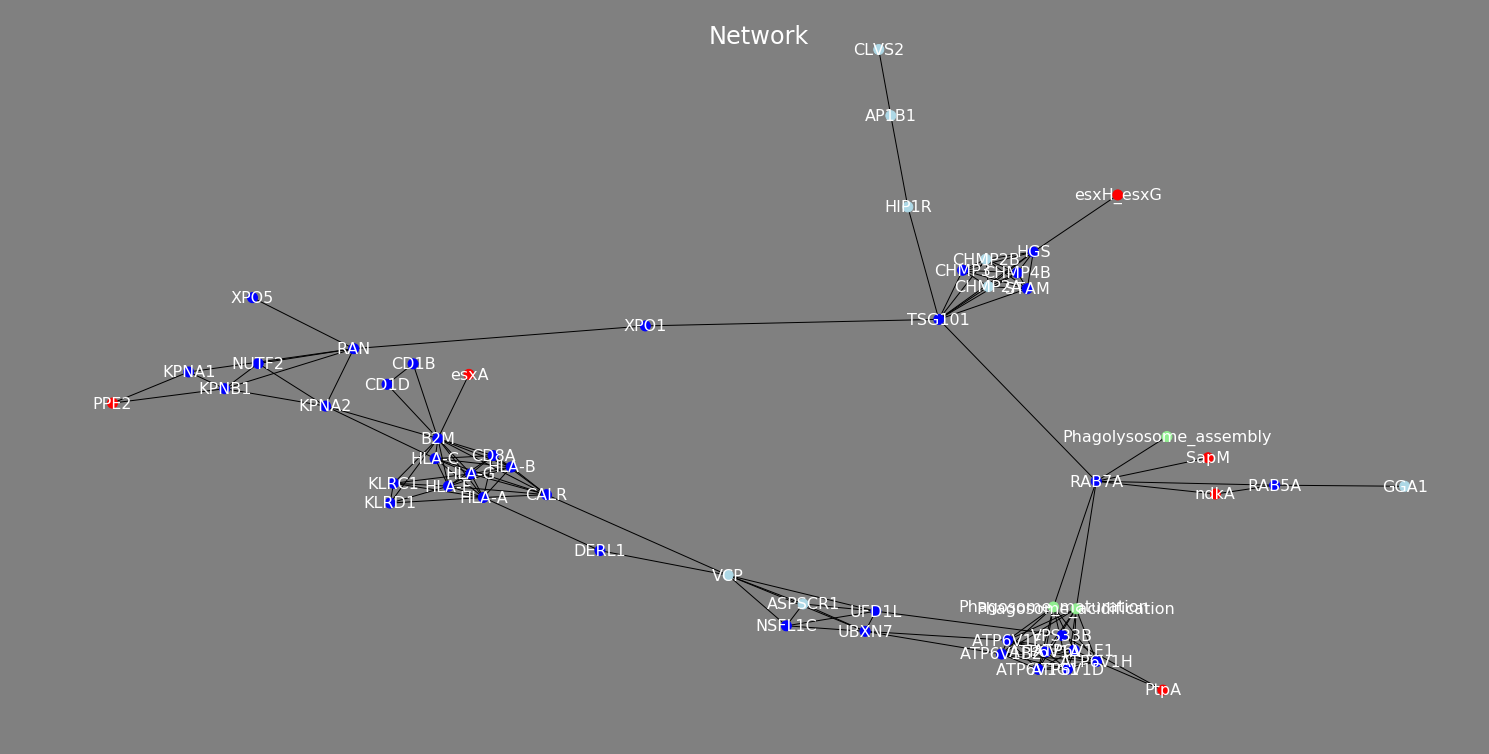

In [202]:
draw_edgelists('string-network-1.csv', 
               add_mtb='mtb-edgelist.csv', 
               add_process='string-1-process-edgelist.csv', 
               highlight=hit
              )

model 2

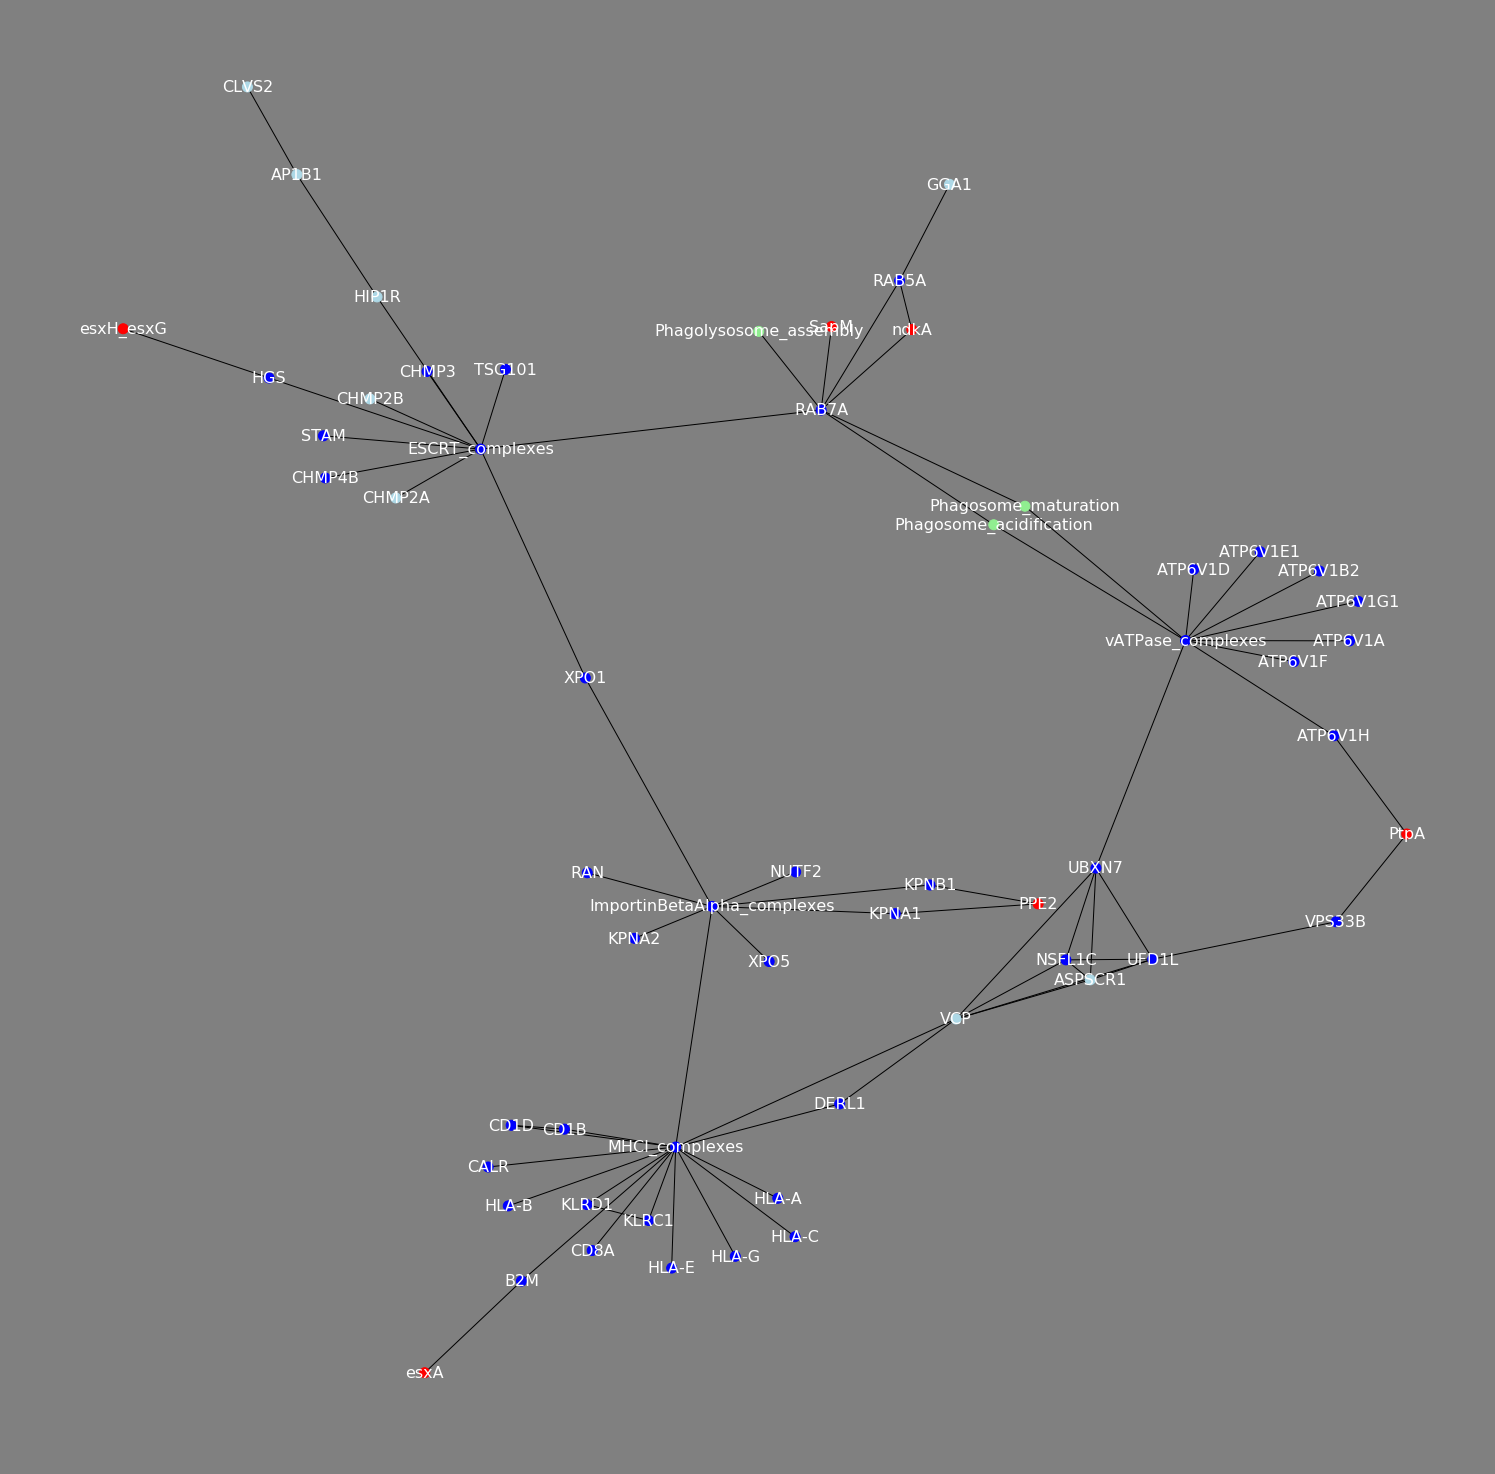

In [98]:
draw_edgelists('string-network-2.csv', 
               add_mtb='mtb-edgelist.csv', 
               add_process='string-2-process-edgelist.csv',
               highlight=hit
              )

model 3

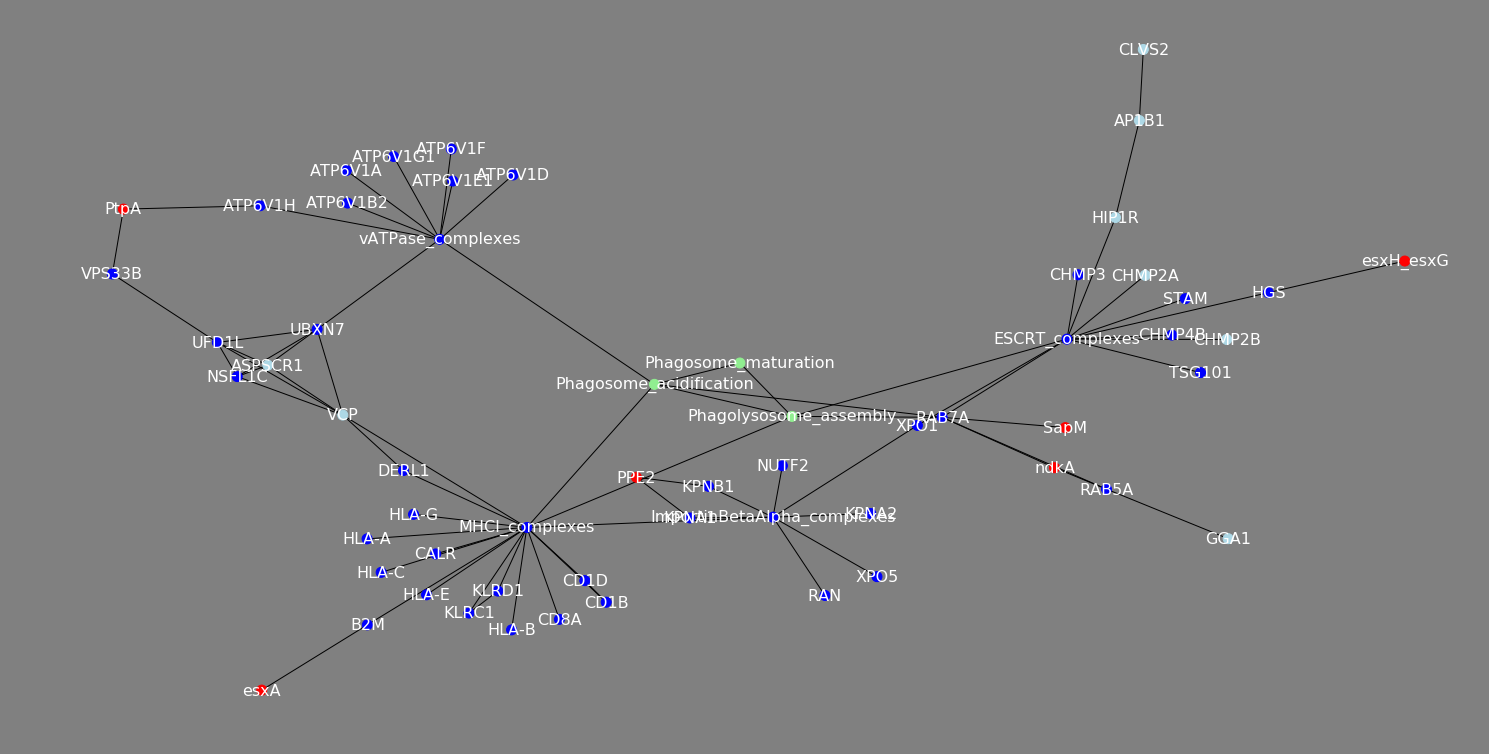

In [106]:
draw_edgelists('string-network-2.csv', # model 3 changes just at the process level
               add_mtb='mtb-edgelist.csv', 
               add_process='string-3-process-edgelist.csv',
               highlight=hit, 
               h = 10, 
               w = 20
              )